ОЦЕНКА КАЧЕСТВА АКСЕЛЕРОМЕТРОВ 

Задание 
1. Проанализировать данные проверки акселерометров.  
2. Оценить качество акселерометров.  
3. Оценить количество «брака». 
4. Подготовить сравнительные графики или диаграммы. 

Порядок выполнения: 
1. Ознакомиться с данными. 
2. Подготовить данные к анализу: очистить от дубликатов, пропусков (или заполнить 
пропуски). 
3. Классифицировать данные: по статусу, по типу акселерометра.
4. Выполнить проверку параметров на корреляцию.   
5. Анализ выбросов во всем температурном диапазоне. 
6. Анализ выбросов на заданных температурах (от минус 15 °С до плюс 40 °С или от 0 
°С до плюс 40 °С). 
7. Анализ классов. 
8. Анализ каналов.  
9. Анализ тяжения, ускорения, дрейфа. 
10. Анализ качества акселерометров. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy import stats as st
from datetime import datetime

In [2]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

In [3]:
import warnings
warnings.filterwarnings('ignore')

1. Ознакомиться с данными.

Импортировал данные:

In [4]:
aksel_data = pd.read_excel('C:/Users/Sergey/Downloads/akselerometr.xlsx', engine='openpyxl')

Посмотрел информацию о таблице:

In [5]:
aksel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9229 entries, 0 to 9228
Data columns (total 21 columns):
 #   Column                                                           Non-Null Count  Dtype         
---  ------                                                           --------------  -----         
 0   Статус                                                           9229 non-null   object        
 1   Номер акселерометра                                              9229 non-null   int64         
 2   Тип акселерометра                                                9229 non-null   object        
 3   № Измерения                                                      9229 non-null   int64         
 4   Дата проверки                                                    9229 non-null   datetime64[ns]
 5   Класс                                                            9229 non-null   object        
 6   Номер канала                                                     7788 non-null  

Посмотрел первые и последние строки таблицы:

In [6]:
aksel_data.head()

,Статус,Номер акселерометра,Тип акселерометра,№ Измерения,Дата проверки,Класс,Номер канала,В. Максимальный выброс,В. Число выбросов,В. Отклонение от т/модели,...,Д. Максимальный выброс,Д. Число выбросов,Д. Отклонение от т/модели,Д. Воспроизводимость от т/модели,Несимметричность тяжения,1g. Воспроизводимость ускорения (для А-15)/тяжения (для КА-1),(-1g).Воспроизводимость ускорения (для А-15)/тяжения (для КА-1),1g. Дрейф ускорения (для А-15)/тяжения (для КА-1),(-1g). Дрейф ускорения (для А-15)/тяжения (для КА-1),Эквивалентный дрейф
0,Черновик,315,А-15,1,2015-05-22,Без класса,NaN,17607.645604,257,24.604404,...,212.307484,72,24.604404,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Черновик,229,А-15,1,2015-04-09,Без класса,NaN,12.400835,15,111.344621,...,3.573107,0,111.344621,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Черновик,2332,КА-1,1,2018-10-25,Без класса,1.0,33.118187,3,0.525104,...,33.118187,1,0.370564,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Черновик,5259,А-15,1,2020-09-23,Класс 2,4.0,1.806899,0,30.140325,...,0.941477,0,30.140325,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Черновик,3590,А-15,2,2019-06-01,Класс 2,1.0,8.168070,2,45.921664,...,1.189157,0,34.470275,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
aksel_data.tail()

,Статус,Номер акселерометра,Тип акселерометра,№ Измерения,Дата проверки,Класс,Номер канала,В. Максимальный выброс,В. Число выбросов,В. Отклонение от т/модели,...,Д. Максимальный выброс,Д. Число выбросов,Д. Отклонение от т/модели,Д. Воспроизводимость от т/модели,Несимметричность тяжения,1g. Воспроизводимость ускорения (для А-15)/тяжения (для КА-1),(-1g).Воспроизводимость ускорения (для А-15)/тяжения (для КА-1),1g. Дрейф ускорения (для А-15)/тяжения (для КА-1),(-1g). Дрейф ускорения (для А-15)/тяжения (для КА-1),Эквивалентный дрейф
9224,Готов,1611,КА-1,1,2018-06-30,Без класса,4.0,16.497042,0,108.002525,...,3.907643,0,103.494118,115.683205,2.466206,-12.364345,-8.177946,-12.011744,-7.347465,NaN
9225,Готов,1610,А-15,1,2018-07-13,Без класса,4.0,12.434606,0,27.596251,...,2.521610,0,24.906855,49.838043,-2.511374,5.460197,6.348620,1.701628,3.426752,NaN
9226,Готов,1609,А-15,1,2018-07-13,Без класса,1.0,521.532043,0,633.843628,...,521.532043,102,633.843628,633.843628,4.400350,-4.848692,20.433218,-4.233243,19.485495,NaN
9227,Готов,1608,А-15,2,2018-07-10,Без класса,6.0,149.556076,0,132.869614,...,3.250170,0,55.549820,61.808025,4.887437,-12.450480,10.773770,-10.045941,5.273820,NaN
9228,Готов,1606,А-15,1,2018-06-05,Класс 2 и 3К,6.0,8.986020,1,30.098763,...,6.225760,1,26.761938,26.761938,-6.004664,3.465931,-10.649480,0.769034,-9.412944,NaN


Посмотрел полную описательную статистику датасета:

In [8]:
aksel_data.describe(include='all')

,Статус,Номер акселерометра,Тип акселерометра,№ Измерения,Дата проверки,Класс,Номер канала,В. Максимальный выброс,В. Число выбросов,В. Отклонение от т/модели,...,Д. Максимальный выброс,Д. Число выбросов,Д. Отклонение от т/модели,Д. Воспроизводимость от т/модели,Несимметричность тяжения,1g. Воспроизводимость ускорения (для А-15)/тяжения (для КА-1),(-1g).Воспроизводимость ускорения (для А-15)/тяжения (для КА-1),1g. Дрейф ускорения (для А-15)/тяжения (для КА-1),(-1g). Дрейф ускорения (для А-15)/тяжения (для КА-1),Эквивалентный дрейф
count,9229,9229.000000,9229,9229.000000,9229,9229,7788.000000,9226.000000,9229.000000,9229.000000,...,9227.000000,9229.000000,9229.000000,6580.000000,7483.000000,7484.000000,7484.000000,6580.000000,6580.000000,7211.000000
unique,2,NaN,3,NaN,NaN,10,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Готов,NaN,А-15,NaN,NaN,Без класса,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,7475,NaN,6247,NaN,NaN,2117,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,4777.672229,NaN,1.719363,2020-03-21 19:41:46.230360832,NaN,3.843092,1583.115198,3.417597,809.194300,...,926.931204,1.328205,539.481259,457.623104,-286.703017,-105.307067,-108.548667,-121.134899,-121.213224,1.676217
min,NaN,38.000000,NaN,1.000000,2003-01-04 00:00:00,NaN,1.000000,0.338655,0.000000,0.387035,...,-1.000000,0.000000,-1.000000,0.000000,-206264.812500,-218149.781250,-143852.015625,-218137.578125,-143851.234375,0.000000
25%,NaN,2359.000000,NaN,1.000000,2018-10-12 00:00:00,NaN,2.000000,2.913229,0.000000,20.002960,...,1.585285,0.000000,17.428717,19.442846,-8.995928,-6.569090,-8.245232,-5.676222,-7.671257,0.021095
50%,NaN,4696.000000,NaN,1.000000,2020-03-18 00:00:00,NaN,3.000000,5.143368,0.000000,34.529373,...,2.637566,0.000000,29.204548,28.444626,-5.456248,2.419960,1.174813,-0.103575,-1.328721,0.035887
75%,NaN,7019.000000,NaN,2.000000,2021-12-13 00:00:00,NaN,5.000000,10.255933,1.000000,68.086334,...,4.895892,0.000000,57.658242,50.894287,4.526841,7.928295,6.801566,4.764301,4.329662,0.062273
max,NaN,9761.000000,NaN,18.000000,2023-10-25 00:00:00,NaN,24.000000,850912.552618,383.000000,883184.388948,...,850912.552618,124.000000,883184.388948,849392.625000,206264.812500,18967.460938,93694.804688,18929.416016,93460.507812,5280.835449


2. Подготовить данные к анализу: очистить от дубликатов, пропусков (или заполнить 
пропуски). 

In [9]:
aksel_data.isna().sum()

Статус                                                                0
Номер акселерометра                                                   0
Тип акселерометра                                                     0
№ Измерения                                                           0
Дата проверки                                                         0
Класс                                                                 0
Номер канала                                                       1441
В. Максимальный выброс                                                3
В. Число выбросов                                                     0
В. Отклонение от т/модели                                             0
В. Воспроизводимость от т/модели                                   2649
Д. Максимальный выброс                                                2
Д. Число выбросов                                                     0
Д. Отклонение от т/модели                                       

Заполнить пропуски нечем, определить эти параметры сложно, поэтому удалил строки.

In [10]:
aksel_data = aksel_data.dropna(subset=['Номер канала'])

In [11]:
aksel_data.isna().sum()

Статус                                                                0
Номер акселерометра                                                   0
Тип акселерометра                                                     0
№ Измерения                                                           0
Дата проверки                                                         0
Класс                                                                 0
Номер канала                                                          0
В. Максимальный выброс                                                3
В. Число выбросов                                                     0
В. Отклонение от т/модели                                             0
В. Воспроизводимость от т/модели                                   1208
Д. Максимальный выброс                                                2
Д. Число выбросов                                                     0
Д. Отклонение от т/модели                                       

In [12]:
aksel_data.head()

,Статус,Номер акселерометра,Тип акселерометра,№ Измерения,Дата проверки,Класс,Номер канала,В. Максимальный выброс,В. Число выбросов,В. Отклонение от т/модели,...,Д. Максимальный выброс,Д. Число выбросов,Д. Отклонение от т/модели,Д. Воспроизводимость от т/модели,Несимметричность тяжения,1g. Воспроизводимость ускорения (для А-15)/тяжения (для КА-1),(-1g).Воспроизводимость ускорения (для А-15)/тяжения (для КА-1),1g. Дрейф ускорения (для А-15)/тяжения (для КА-1),(-1g). Дрейф ускорения (для А-15)/тяжения (для КА-1),Эквивалентный дрейф
2,Черновик,2332,КА-1,1,2018-10-25,Без класса,1.0,33.118187,3,0.525104,...,33.118187,1,0.370564,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Черновик,5259,А-15,1,2020-09-23,Класс 2,4.0,1.806899,0,30.140325,...,0.941477,0,30.140325,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Черновик,3590,А-15,2,2019-06-01,Класс 2,1.0,8.168070,2,45.921664,...,1.189157,0,34.470275,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Черновик,3262,А-15,1,2019-03-28,Класс 2,2.0,4.248740,0,40.356428,...,2.084838,0,40.356428,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Черновик,3261,А-15,3,2019-03-28,Класс 1,5.0,4.464080,0,29.492042,...,1.796689,0,29.492042,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Избавился от пропусков в столбце 'Номер канала'.

In [13]:
aksel_data = aksel_data.dropna(subset=['В. Максимальный выброс'])
aksel_data = aksel_data.dropna(subset=['В. Воспроизводимость от т/модели'])
aksel_data = aksel_data.dropna(subset=['Несимметричность тяжения'])
aksel_data = aksel_data.dropna(subset=['Эквивалентный дрейф'])

In [14]:
aksel_data.isna().sum()

Статус                                                             0
Номер акселерометра                                                0
Тип акселерометра                                                  0
№ Измерения                                                        0
Дата проверки                                                      0
Класс                                                              0
Номер канала                                                       0
В. Максимальный выброс                                             0
В. Число выбросов                                                  0
В. Отклонение от т/модели                                          0
В. Воспроизводимость от т/модели                                   0
Д. Максимальный выброс                                             0
Д. Число выбросов                                                  0
Д. Отклонение от т/модели                                          0
Д. Воспроизводимость от т/модели  

Избавился от пропусков во всём датасете.


Вывод: 
пропуски могли возникнуть по многим причинам, например: не велся опрос в данных условиях, техническая ошибка и прочее.

3. Классифицировать данные: по статусу, по типу акселерометра. 

Классификация по статусу:

Text(0, 0.5, 'Количество акселерометров')

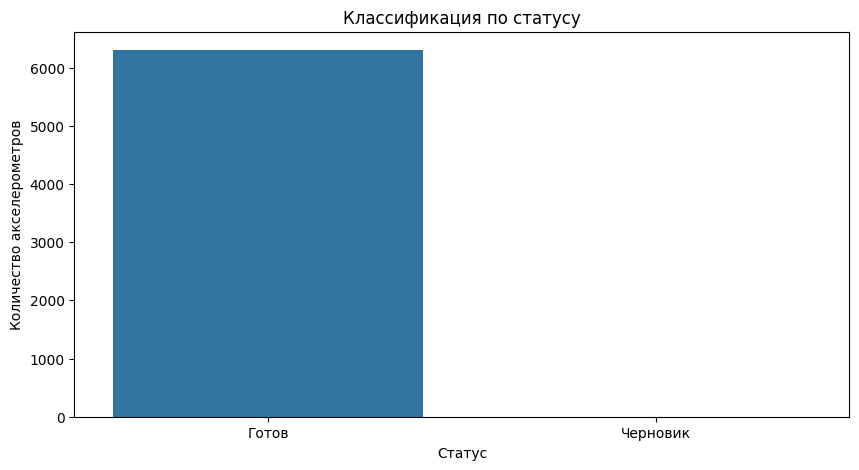

In [15]:
aksel_annual = aksel_data.pivot_table(index='Статус', values='Номер акселерометра', aggfunc='count').sort_values(
    by='Номер акселерометра', ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=aksel_annual.index,y=aksel_annual['Номер акселерометра'])
plt.title('Классификация по статусу')
plt.xlabel("Статус")
plt.ylabel("Количество акселерометров")

Вывод: исходя из полученной диаграммы, можно заключить, что все акселерометры, у которых измерены все параметры, имеют статус "Готов".

Классификация по типу акселерометра:

Text(0, 0.5, 'Количество акселерометров')

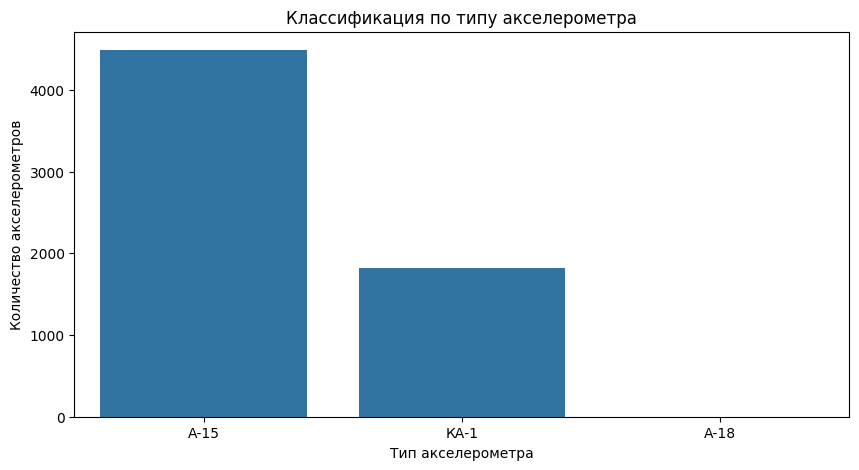

In [16]:
aksel_annual = aksel_data.pivot_table(index='Тип акселерометра', values='Номер акселерометра', aggfunc='count').sort_values(
    by='Номер акселерометра', ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=aksel_annual.index,y=aksel_annual['Номер акселерометра'])
plt.title('Классификация по типу акселерометра')
plt.xlabel("Тип акселерометра")
plt.ylabel("Количество акселерометров")

Вывод: исходя из полученной диаграммы, можно резюмировать, что акселерометров типа "А-15" примерно в 2,5 раза больше, чем акселерометров типа "КА-1". Измерения данных с акселерометров типа "А-18" отсутствуют.

4. Выполнить проверку параметров на корреляцию. 

Корреляция между несимметричностью тяжения и эквивалентным дрейфом:

In [17]:
aksel_data['Несимметричность тяжения'].corr(aksel_data['Эквивалентный дрейф'])

np.float64(0.0003588357986829193)

Построил диаграмму рассеяния:

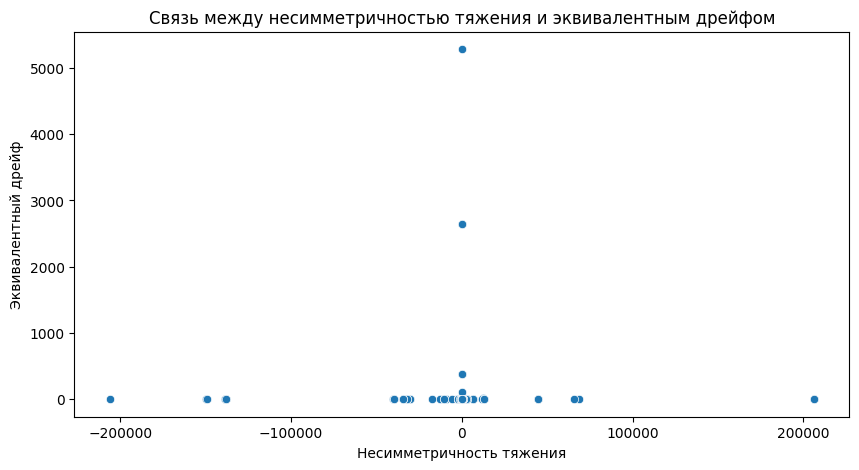

In [18]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Несимметричность тяжения', y='Эквивалентный дрейф', data=aksel_data)
plt.title('Связь между несимметричностью тяжения и эквивалентным дрейфом')
plt.xlabel("Несимметричность тяжения")
plt.ylabel("Эквивалентный дрейф")
plt.show()

Вывод: корреляции между несимметричностью тяжения и эквивалентным дрейфом нет.

Корреляция между максимальными выбросами во всем температурном диапазоне и  на заданных температурах: 

In [19]:
aksel_data['В. Максимальный выброс'].corr(aksel_data['Д. Максимальный выброс'])

np.float64(0.8816360247810732)

Построил диаграмму рассеяния:

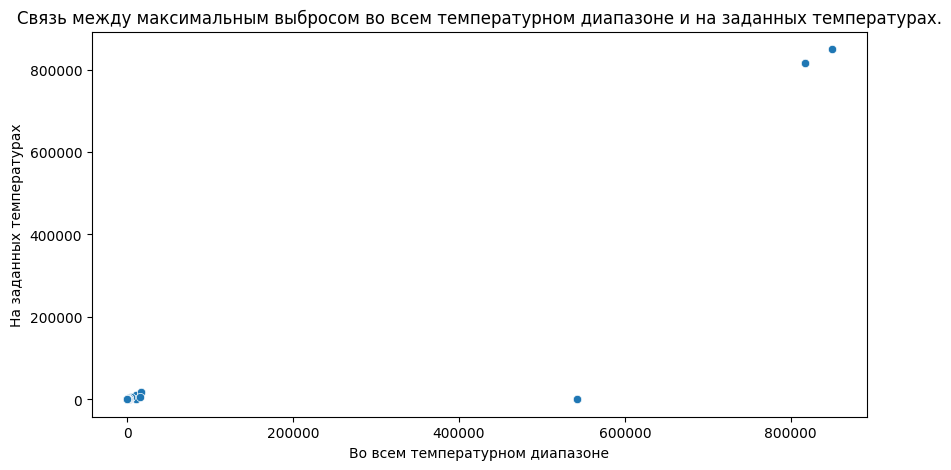

In [20]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='В. Максимальный выброс', y='Д. Максимальный выброс', data=aksel_data)
plt.title('Связь между максимальным выбросом во всем температурном диапазоне и на заданных температурах.')
plt.xlabel("Во всем температурном диапазоне")
plt.ylabel("На заданных температурах")
plt.show()

Корреляция между максимальными выбросами во всем температурном диапазоне и  на заданных температурах равна 0.88, что говорит о сильной связи между этими параметрами.

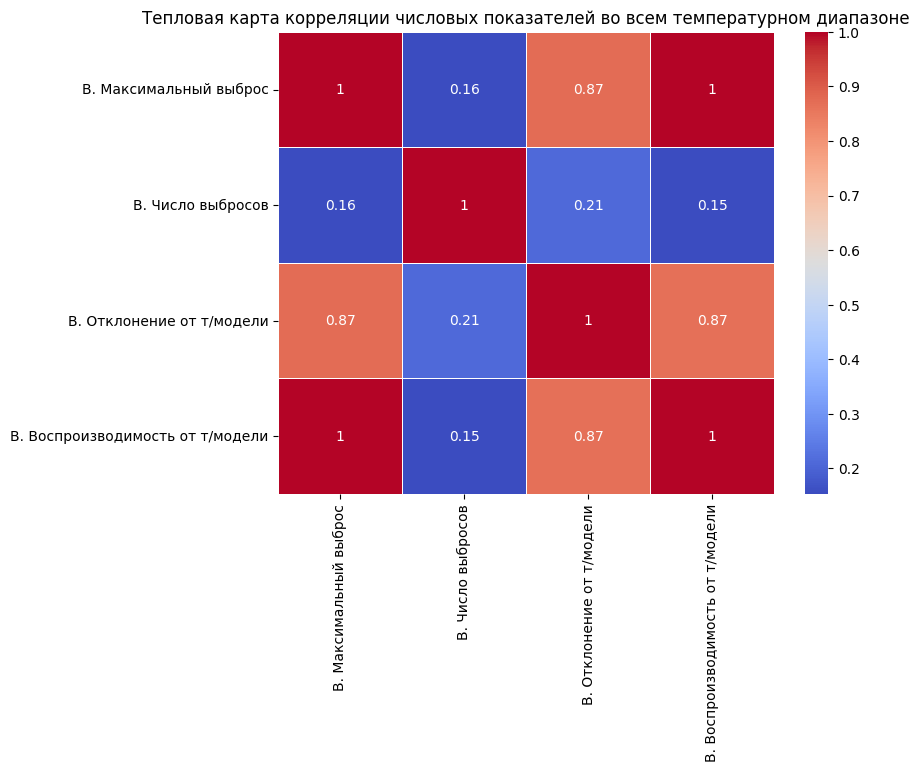

In [24]:
plt.figure(figsize=(8, 6))
correlation_matrix_1 = aksel_data[['В. Максимальный выброс', 'В. Число выбросов', 'В. Отклонение от т/модели', 'В. Воспроизводимость от т/модели']].corr()
sns.heatmap(correlation_matrix_1, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Тепловая карта корреляции числовых показателей во всем температурном диапазоне")
plt.show()

Во всем температурном диапазоне самая сильная корреляция наблюдается между отклонением от т/модели и максимальным выбросом, коэффициент равен 0,87 (сильная связь). Корреляция между отклонением от т/модели и воспроизводимостью от т/модели также равняется 0,87 (сильная связь). Между остальными показателями имеется слабая связь.

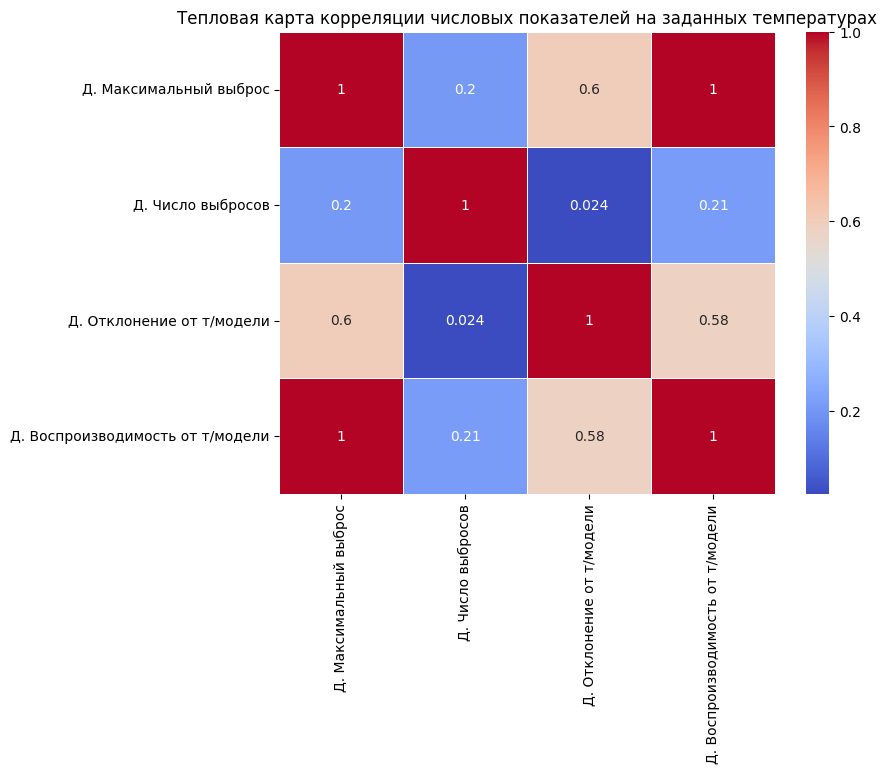

In [25]:
plt.figure(figsize=(8, 6))
correlation_matrix_2 = aksel_data[['Д. Максимальный выброс', 'Д. Число выбросов', 'Д. Отклонение от т/модели', 'Д. Воспроизводимость от т/модели']].corr()
sns.heatmap(correlation_matrix_2, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Тепловая карта корреляции числовых показателей на заданных температурах")
plt.show()

На заданных температурах самая сильная корреляция наблюдается между отклонением от т/модели и максимальным выбросом, коэффициент равен 0,6 (средняя связь). Корреляция между отклонением от т/модели и воспроизводимостью от т/модели равняется 0,58 (средняя связь). Между остальными показателями имеется слабая связь.

5. Анализ выбросов во всем температурном диапазоне. 

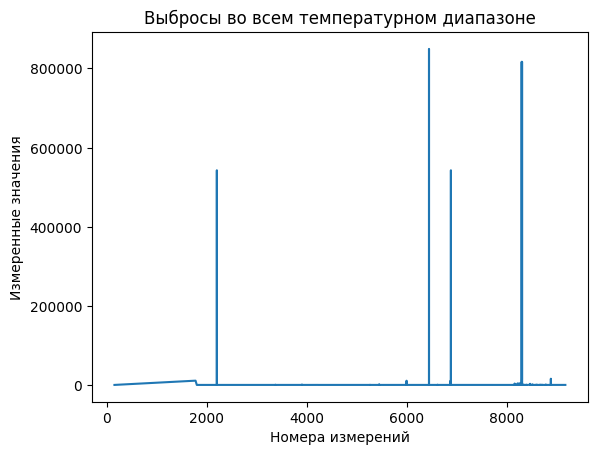

In [22]:
aksel_data['В. Максимальный выброс'].plot()
plt.title('Выбросы во всем температурном диапазоне')
plt.xlabel("Номера измерений")
plt.ylabel("Измеренные значения")
plt.show()

Вывод: исходя из полученной диаграммы, делаю вывод, что во всём температурном диапазоне имеется несколько выбросов. Наибольшее количество выбросов находится в диапазоне измерений от 6300 до 8300.

6. Анализ выбросов на заданных температурах (от минус 15 °С до плюс 40 °С или от 0 
°С до плюс 40 °С). 

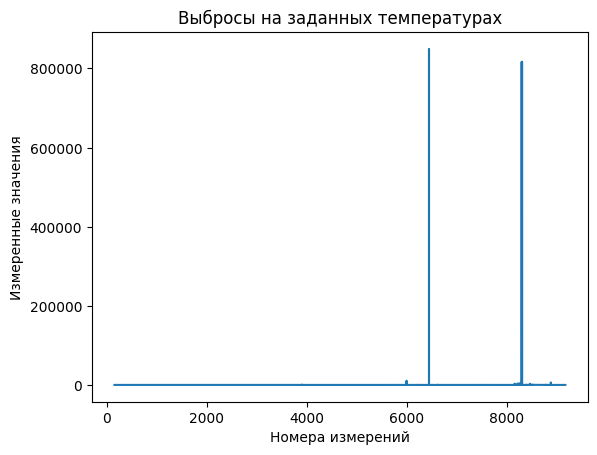

In [23]:
aksel_data['Д. Максимальный выброс'].plot()
plt.title('Выбросы на заданных температурах')
plt.xlabel("Номера измерений")
plt.ylabel("Измеренные значения")
plt.show()

Вывод: исходя из полученной диаграммы, заключаю, что на заданных температурах (от минус 15 °С до плюс 40 °С или от 0 °С до плюс 40 °С) имеется несколько выбросов. Наибольшее количество выбросов находится в диапазоне измерений от 6300 до 8300.

7. Анализ классов. 

Text(0, 0.5, 'Количество акселерометров')

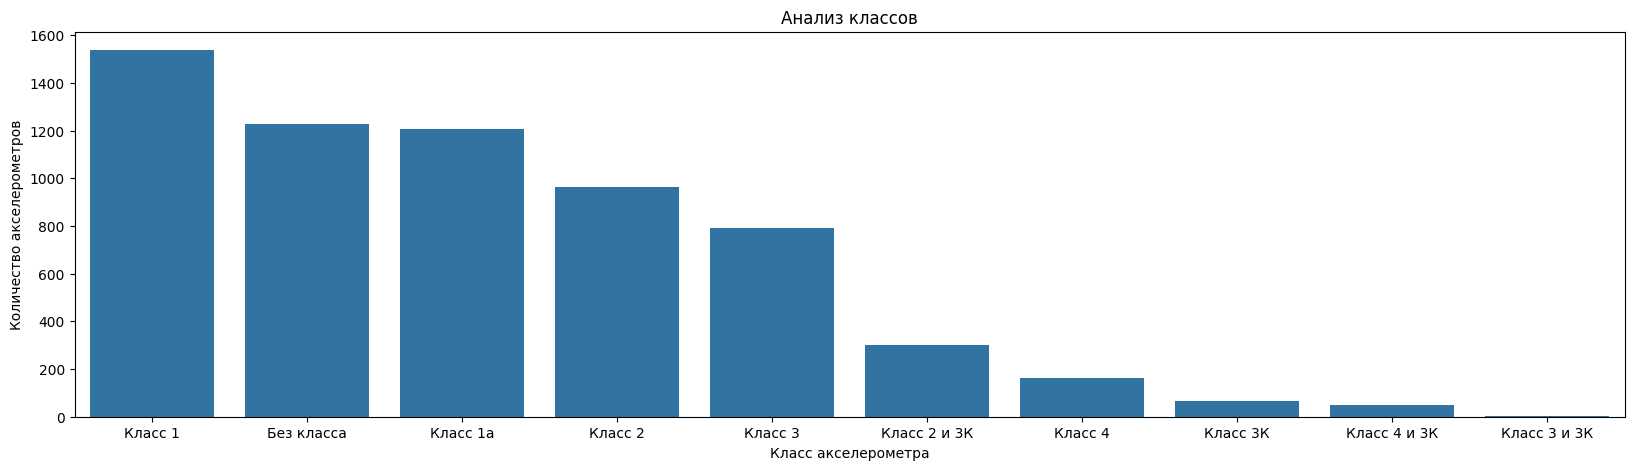

In [24]:
aksel_annual = aksel_data.pivot_table(index='Класс', values='Номер акселерометра', aggfunc='count').sort_values(
    by='Номер акселерометра', ascending=False)

plt.figure(figsize=(20,5))
sns.barplot(x=aksel_annual.index,y=aksel_annual['Номер акселерометра'])
plt.title('Анализ классов')
plt.xlabel("Класс акселерометра")
plt.ylabel("Количество акселерометров")

Вывод: исходя из полученной диаграммы, резюмирую, что больше всего акселерометров "Класс 1". Меньше всего акселерометров "Класс 3 и 3К".

8. Анализ каналов.

Text(0, 0.5, 'Количество акселерометров')

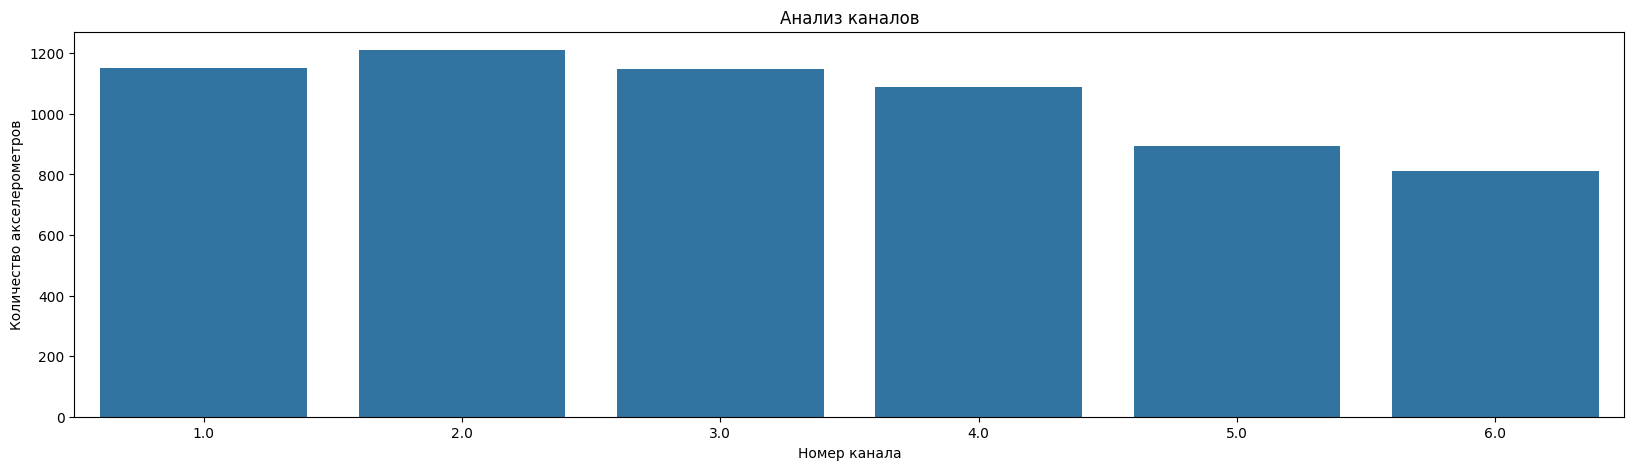

In [25]:
aksel_annual = aksel_data.pivot_table(index='Номер канала', values='Номер акселерометра', aggfunc='count').sort_values(
    by='Номер акселерометра', ascending=False)

plt.figure(figsize=(20,5))
sns.barplot(x=aksel_annual.index,y=aksel_annual['Номер акселерометра'])
plt.title('Анализ каналов')
plt.xlabel("Номер канала")
plt.ylabel("Количество акселерометров")

Вывод: исходя из полученной диаграммы, заключаю, что чаще всего использовался канал 2.0. Канал 6.0 использовался реже остальных.

9. Анализ тяжения, ускорения, дрейфа.

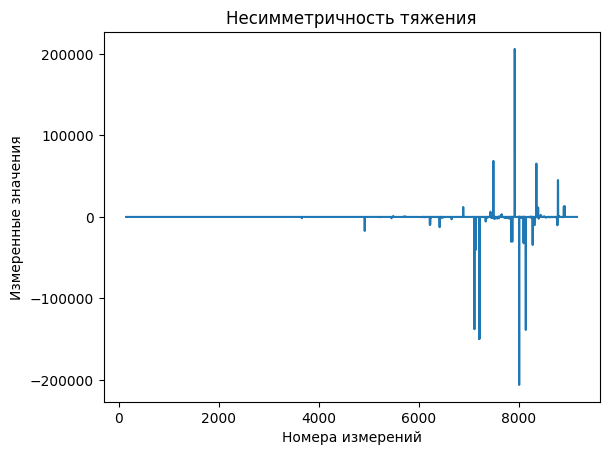

In [26]:
aksel_data['Несимметричность тяжения'].plot()
plt.title('Несимметричность тяжения')
plt.xlabel("Номера измерений")
plt.ylabel("Измеренные значения")
plt.show()

Вывод: исходя из полученной диаграммы, резюмирую, что наибольшее количество выбросов несимметричности тяжения находится в диапазоне измерений от 6500 до 9000.

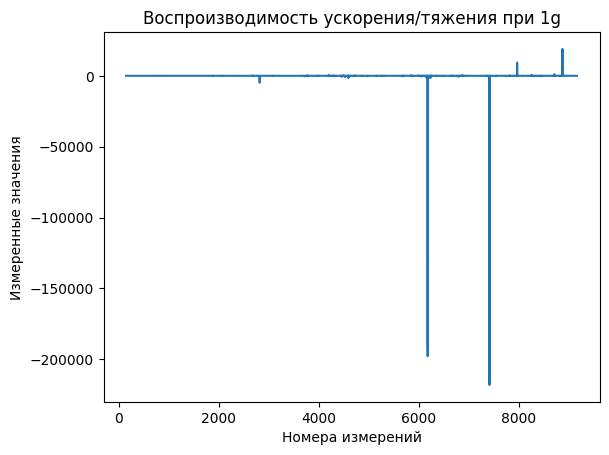

In [29]:
aksel_data['1g. Воспроизводимость ускорения (для А-15)/тяжения (для КА-1)'].plot()
plt.title('Воспроизводимость ускорения/тяжения при 1g')
plt.xlabel("Номера измерений")
plt.ylabel("Измеренные значения")
plt.show()

Вывод: исходя из полученной диаграммы, делаю вывод, что наибольшее количество выбросов воспроизводимости ускорения/тяжения при 1g находится в диапазоне измерений от 6000 до 7500.

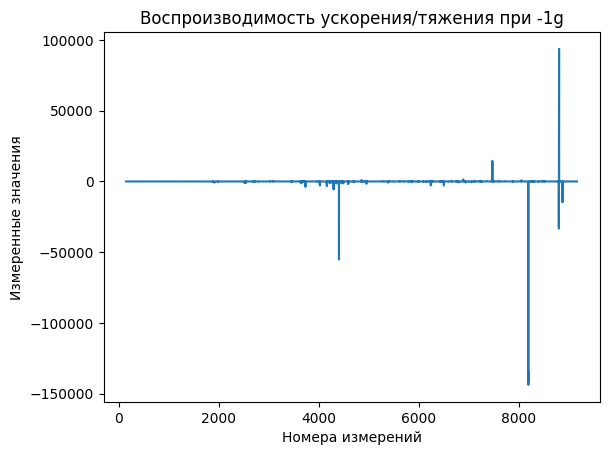

In [30]:
aksel_data['(-1g).Воспроизводимость ускорения (для А-15)/тяжения (для КА-1)'].plot()
plt.title('Воспроизводимость ускорения/тяжения при -1g')
plt.xlabel("Номера измерений")
plt.ylabel("Измеренные значения")
plt.show()

Вывод: исходя из полученной диаграммы, заключаю, что наибольшее количество выбросов воспроизводимости ускорения/тяжения при -1g находится в диапазоне измерений от 8000 до 9000.

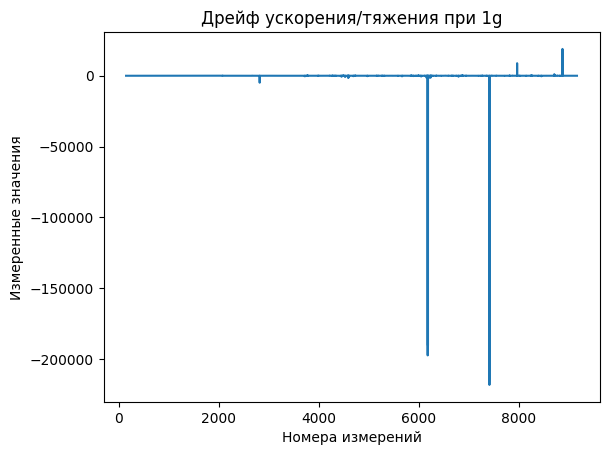

In [32]:
aksel_data['1g. Дрейф ускорения (для А-15)/тяжения (для КА-1)'].plot()
plt.title('Дрейф ускорения/тяжения при 1g')
plt.xlabel("Номера измерений")
plt.ylabel("Измеренные значения")
plt.show()

Вывод: исходя из полученной диаграммы, можно резюмировать, что наибольшее количество выбросов дрейфа ускорения/тяжения при 1g находится в диапазоне измерений от 6000 до 7500.

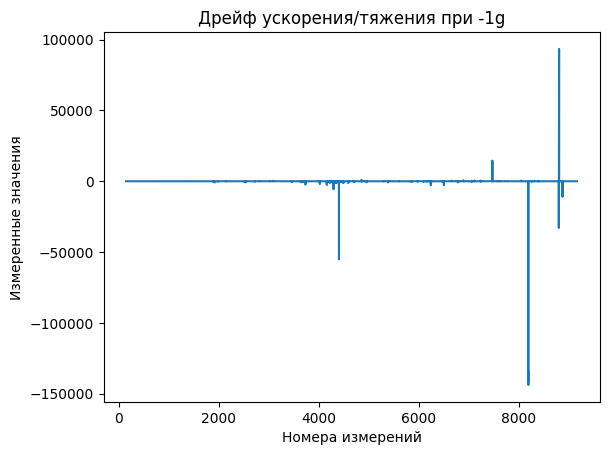

In [33]:
aksel_data['(-1g). Дрейф ускорения (для А-15)/тяжения (для КА-1)'].plot()
plt.title('Дрейф ускорения/тяжения при -1g')
plt.xlabel("Номера измерений")
plt.ylabel("Измеренные значения")
plt.show()

Вывод: исходя из полученной диаграммы, можно сделать вывод, что наибольшее количество выбросов дрейфа ускорения/тяжения при -1g находится в диапазоне измерений от 8000 до 9000.

10. Анализ качества акселерометров.

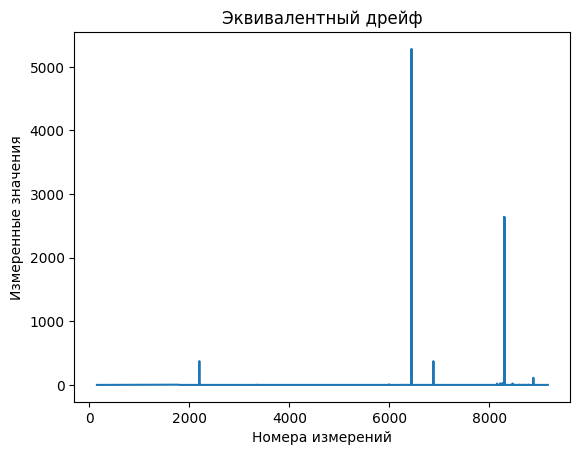

In [34]:
aksel_data['Эквивалентный дрейф'].plot()
plt.title('Эквивалентный дрейф')
plt.xlabel("Номера измерений")
plt.ylabel("Измеренные значения")
plt.show()

Вывод: исходя из полученной диаграммы, можно заключить, что наибольшее количество выбросов эквивалентного дрейфа находится в диапазоне измерений от 6000 до 8500.

Общий вывод: 

Большинство акселерометров, у которых были измерены параметры, соответствуют стандартам качества. Было обнаружено, что все тестируемые акселерометры имеют статус "Готов". Измерены были только акселерометры типа "А-15" и акселерометры типа "КА-1". Измерения данных с акселерометров типа "А-18" отсутствуют. Были удалены строки с пропусками. Во всем температурном диапазоне самая сильная корреляция наблюдается между отклонением от т/модели и максимальным выбросом, коэффициент равен 0,87 (сильная связь). Корреляция между отклонением от т/модели и воспроизводимостью от т/модели также равняется 0,87 (сильная связь). На заданных температурах самая сильная корреляция наблюдается между отклонением от т/модели и максимальным выбросом, коэффициент равен 0,6 (средняя связь). Корреляция между отклонением от т/модели и воспроизводимостью от т/модели равняется 0,58 (средняя связь).